**Singleton** is a creational design pattern that lets you ensure that a class has only one instance, while providing a global access point to this instance.

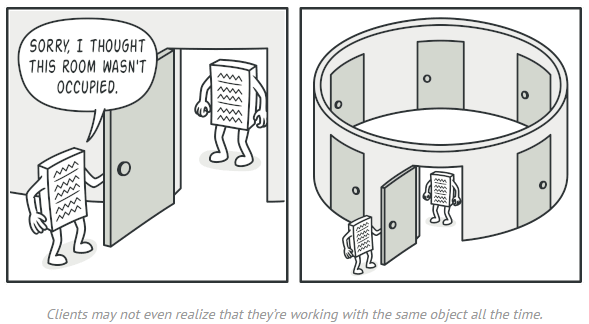

**Applicability**

- **Use the Singleton pattern when a class in your program should have just a single instance available to all clients; for example, a single database object shared by different parts of the program.**

    > The Singleton pattern disables all other means of creating objects of a class except for the special creation method. This method either creates a new object or returns an existing one if it has already been created.

- **Use the Singleton pattern when you need stricter control over global variables.**

    > Unlike global variables, the Singleton pattern guarantees that there’s just one instance of a class. Nothing, except for the Singleton class itself, can replace the cached instance.

    > Note that you can always adjust this limitation and allow creating any number of Singleton instances. The only piece of code that needs changing is the body of the getInstance method.
    

### Code Examples

**Naïve Singleton**

It’s pretty easy to implement a sloppy Singleton. You just need to hide the constructor and implement a static creation method.

The same class behaves incorrectly in a multithreaded environment. Multiple threads can call the creation method simultaneously and get several instances of Singleton class.

In [1]:
class SingletonMeta(type):
    """
    The Singleton class can be implemented in different ways in Python. Some
    possible methods include: base class, decorator, metaclass. We will use the
    metaclass because it is best suited for this purpose.
    """

    _instances = {}

    def __call__(cls, *args, **kwargs):
        """
        Possible changes to the value of the `__init__` argument do not affect
        the returned instance.
        """
        if cls not in cls._instances:
            instance = super().__call__(*args, **kwargs)
            cls._instances[cls] = instance
        return cls._instances[cls]


class Singleton(metaclass=SingletonMeta):
    def some_business_logic(self):
        """
        Finally, any singleton should define some business logic, which can be
        executed on its instance.
        """

        # ...


if __name__ == "__main__":
    # The client code.

    s1 = Singleton()
    s2 = Singleton()

    if id(s1) == id(s2):
        print("Singleton works, both variables contain the same instance.")
    else:
        print("Singleton failed, variables contain different instances.")

Singleton works, both variables contain the same instance.


**Thread-safe Singleton**

To fix the problem, you have to synchronize threads during the first creation of the Singleton object.

In [2]:
from threading import Lock, Thread


class SingletonMeta(type):
    """
    This is a thread-safe implementation of Singleton.
    """

    _instances = {}

    _lock: Lock = Lock()
    """
    We now have a lock object that will be used to synchronize threads during
    first access to the Singleton.
    """

    def __call__(cls, *args, **kwargs):
        """
        Possible changes to the value of the `__init__` argument do not affect
        the returned instance.
        """
        # Now, imagine that the program has just been launched. Since there's no
        # Singleton instance yet, multiple threads can simultaneously pass the
        # previous conditional and reach this point almost at the same time. The
        # first of them will acquire lock and will proceed further, while the
        # rest will wait here.
        with cls._lock:
            # The first thread to acquire the lock, reaches this conditional,
            # goes inside and creates the Singleton instance. Once it leaves the
            # lock block, a thread that might have been waiting for the lock
            # release may then enter this section. But since the Singleton field
            # is already initialized, the thread won't create a new object.
            if cls not in cls._instances:
                instance = super().__call__(*args, **kwargs)
                cls._instances[cls] = instance
        return cls._instances[cls]


class Singleton(metaclass=SingletonMeta):
    value: str = None
    """
    We'll use this property to prove that our Singleton really works.
    """

    def __init__(self, value: str) -> None:
        self.value = value

    def some_business_logic(self):
        """
        Finally, any singleton should define some business logic, which can be
        executed on its instance.
        """


def test_singleton(value: str) -> None:
    singleton = Singleton(value)
    print(singleton.value)


if __name__ == "__main__":
    # The client code.

    print("If you see the same value, then singleton was reused (yay!)\n"
          "If you see different values, "
          "then 2 singletons were created (booo!!)\n\n"
          "RESULT:\n")

    process1 = Thread(target=test_singleton, args=("FOO",))
    process2 = Thread(target=test_singleton, args=("BAR",))
    process1.start()
    process2.start()

If you see the same value, then singleton was reused (yay!)
If you see different values, then 2 singletons were created (booo!!)

RESULT:

FOO
FOO
